In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context("paper", font_scale = 2)

# %cd  '/home/ferrari/Dropbox/Workon/Ana-Chies-Santos/2022-SPLUS-jellyfish'
#catM = pd.read_csv('../SPLUS-STRIPE82-HYRA-I-iDR3_mfmtk+table18.csv')
# %

In [2]:
D = pd.read_csv('Morfometryka_params_all_galaxies_with_JClass.csv')
D.shape, D[D['QF'] == 0].shape

((207, 61), (122, 61))

In [3]:
D.columns

Index(['Unnamed: 0', '# rootname919                                     ',
       'Mo', 'No', 'psffwhm', 'asecpix', 'skybg', 'skybgstd', 'x0peak',
       'y0peak', 'x0col', 'y0col', 'x0A1fit', 'y0A1fit', 'x0A3fit', 'y0A3fit',
       'a', 'b', 'PAdeg', 'InFit1D', 'RnFit1D', 'nFit1D', 'xsin', 'x0Fit2D',
       'y0Fit2D', 'InFit2D', 'RnFit2D', 'nFit2D', 'qFit2D', 'PAFit2D', 'LT',
       'R10', 'R20', 'R30', 'R40', 'R50', 'R60', 'R70', 'R80', 'R90', 'Rp',
       'C1', 'C2', 'BGmedian', 'A_e', 'A0', 'A1', 'A2', 'A3', 'A4', 'S1', 'S3',
       'G', 'M20', 'psi', 'sigma_psi', 'H', 'IRkurvmedian', 'IRkurvmad', 'QF',
       'JClass'],
      dtype='object')

In [4]:
J0 = (D['JClass']==0) & (D['QF'] ==0)
J1 = (D['JClass']==1) & (D['QF'] ==0)
J2 = (D['JClass']==2) & (D['QF'] ==0)
J3 = (D['JClass']==3) & (D['QF'] ==0)
J4 = (D['JClass']==4) & (D['QF'] ==0)

## My final plots

In [5]:
colors = np.array(['#7f2704', '#d94801', '#fd8d3c', '#fdd0a2', 'gray'])
colors = colors[::-1]
my_palette = sns.color_palette(colors)

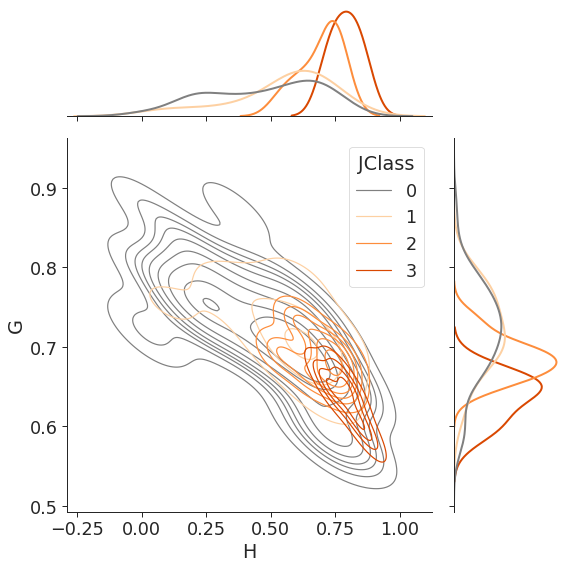

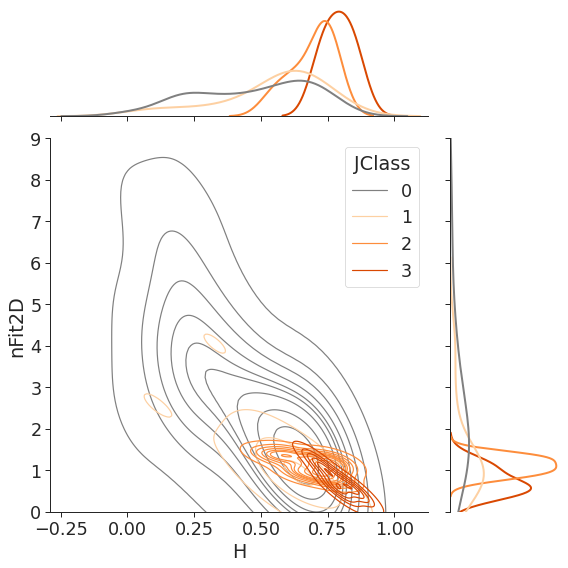

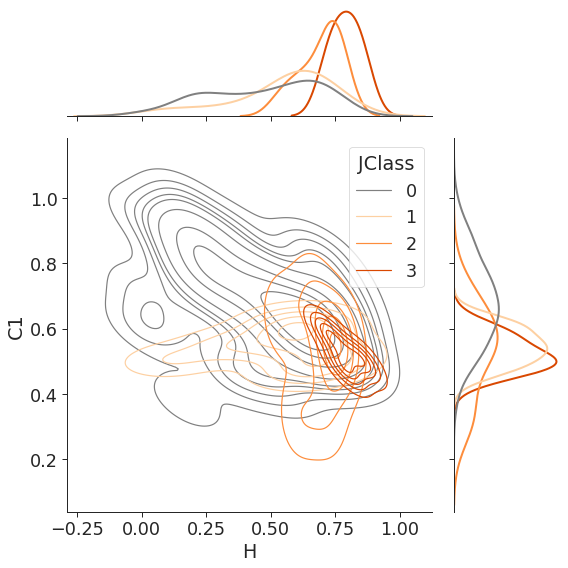

In [9]:
kind = 'kde'

D_subset = D[D['QF'] == 0]
D_subset = D_subset[D_subset['JClass'] != 4]
my_palette_truncated = sns.color_palette(colors[:-1])

# sns.jointplot(
#     data=D_subset, x='C1', y='A1', hue='JClass',
#     kind=kind, marginal_kws={'common_norm': False, 'linewidth': 2.0}, palette=my_palette_truncated,
#     ratio=3, height=8, #fill=True, alpha=0.5
# )
# plt.show()

#####################################################
g = sns.jointplot(
    data=D_subset, x='H', y='G', hue='JClass',
    kind=kind, marginal_kws={'common_norm': False, 'linewidth': 2.0}, palette=my_palette_truncated,
    ratio=3, height=8#fill=True, alpha=0.5
)
#plt.legend(title='JClass', loc='upper right', labels=['0', '1', '2', '3'])
# g._legend.set_title(new_title)

# # set the linewidth of each legend object
# for legobj in ax.legend_.legendHandles:
#     legobj.set_linewidth(2.0)

plt.savefig('HvsG.png', bbox_inches='tight', dpi=250)
plt.show()

#####################################################
g = sns.jointplot(
    data=D_subset, x='H', y='nFit2D', hue='JClass',
    kind=kind, marginal_kws={'common_norm': False, 'linewidth': 2.0}, palette=my_palette_truncated,
    ratio=3, height=8, ylim=([0, 9]) #fill=True, alpha=0.5
)
#plt.legend(title='JClass', loc='upper right', labels=['0', '1', '2', '3'])
# g._legend.set_title(new_title)

# # set the linewidth of each legend object
# for legobj in ax.legend_.legendHandles:
#     legobj.set_linewidth(2.0)

plt.savefig('HvsnFit2D.png', bbox_inches='tight', dpi=250)
plt.show()
#####################################################

g = sns.jointplot(
    data=D_subset, x='H', y='C1', hue='JClass',
    kind=kind, marginal_kws={'common_norm': False, 'linewidth': 2.0}, palette=my_palette_truncated,
    ratio=3, height=8 #fill=True, alpha=0.5
)
#plt.legend(title='JClass', loc='upper right', labels=['0', '1', '2', '3'])
# g._legend.set_title(new_title)

# # set the linewidth of each legend object
# for legobj in ax.legend_.legendHandles:
#     legobj.set_linewidth(2.0)

plt.show()

In [10]:
D_subset.shape

(120, 61)

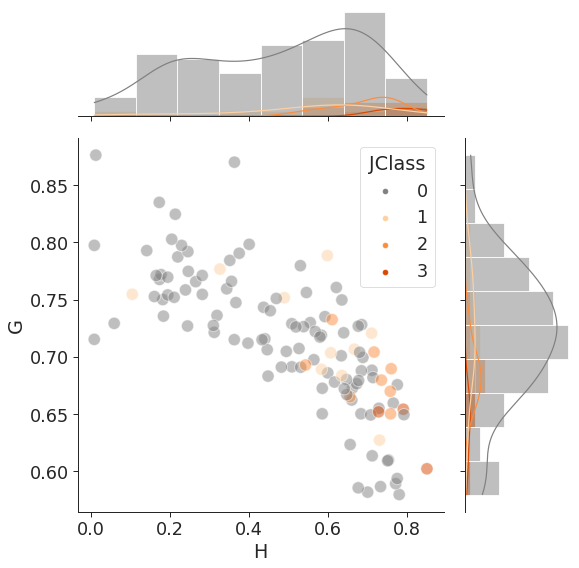

In [21]:
g = sns.JointGrid(data=D_subset, x="H", y="G", hue='JClass', palette=my_palette_truncated, ratio=3, height=8)
g.plot_joint(sns.scatterplot, s=150, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

## Old experiments

/home/oem/.local/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/oem/.local/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/home/oem/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/oem/.local/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


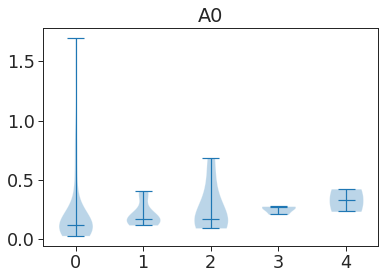

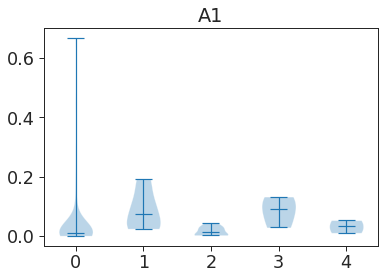

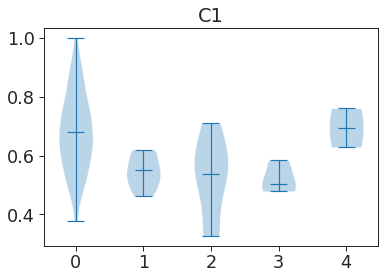

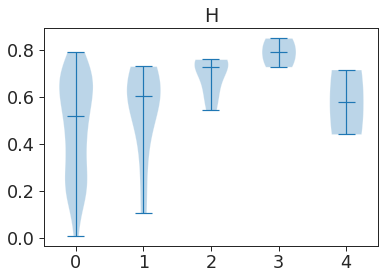

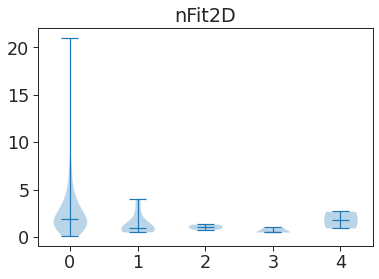

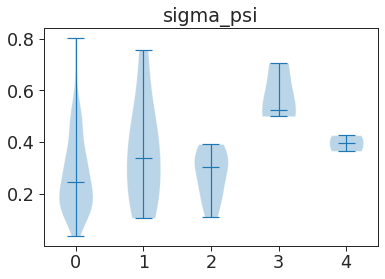

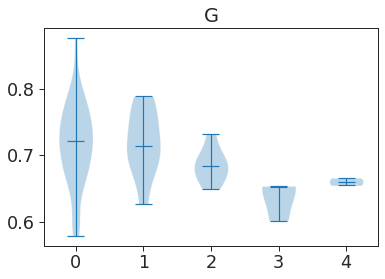

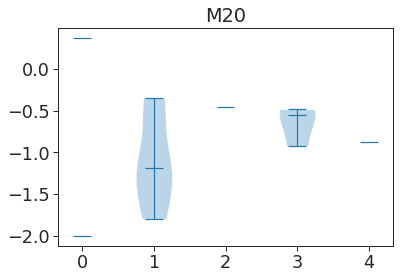

In [5]:
jj = np.arange(5)
for V in ['A0', 'A1', 'C1', 'H', 'nFit2D', 'sigma_psi', 'G', 'M20']:
    plt.figure()
    plt.violinplot( [ D[J0][V], D[J1][V], D[J2][V], D[J3][V], D[J4][V] ] , jj, showextrema=True, showmedians=True)
    plt.title(V)


In [6]:
colors = ['red', 'blue', 'green', 'orange']
classes = ['J0', 'J1', 'J2', 'J3']

# TODO: How to include JC4?

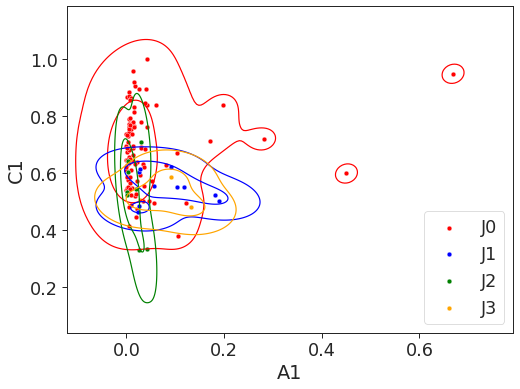

In [11]:
XX = 'A1'
YY = 'C1'

plt.figure(figsize=(8,6))
for i, jj in enumerate([J0, J1, J2, J3]):
    sea.scatterplot(x=D[jj][XX], y=D[jj][YY], color=colors[i], label=classes[i])
    sea.kdeplot(x=D[jj][XX], y=D[jj][YY], levels=3, fill=0, color=colors[i])

plt.legend()

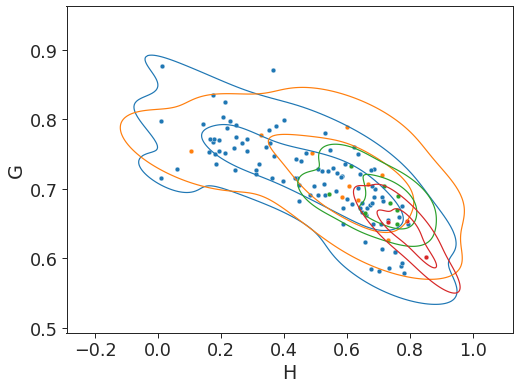

In [28]:
XX = 'H'
YY = 'G'

plt.figure(figsize=(8,6))
for jj in [J0, J1, J2, J3]:
    sea.scatterplot(x=D[jj][XX], y=D[jj][YY])
    sea.kdeplot(x=D[jj][XX], y=D[jj][YY], levels=3, fill=0)

# plt.savefig('JClass_HvsG.png')

/home/oem/.local/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


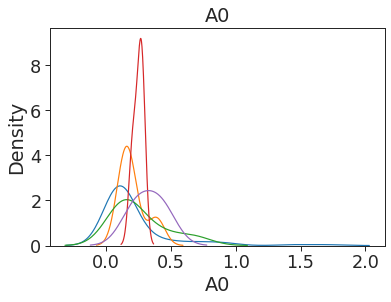

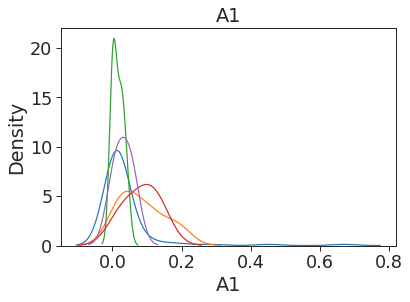

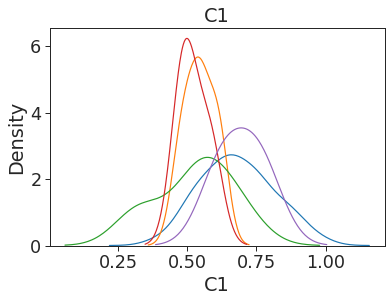

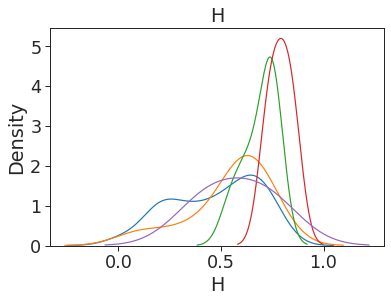

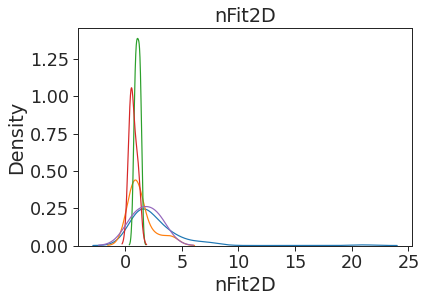

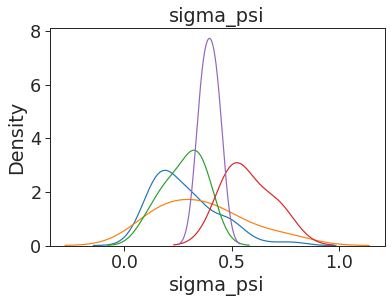

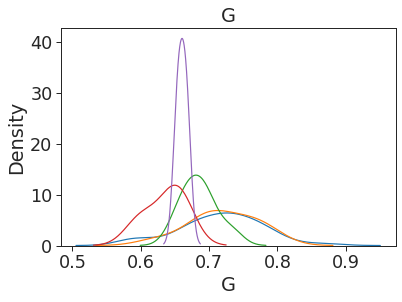

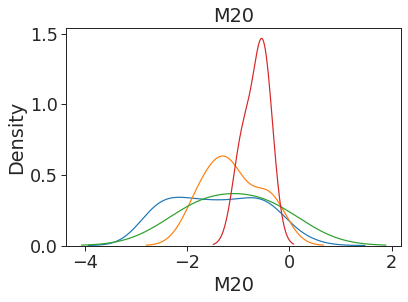

In [29]:
jj = np.arange(5)
for V in ['A0', 'A1', 'C1', 'H', 'nFit2D', 'sigma_psi', 'G', 'M20']:
    plt.figure()
    sea.kdeplot(  D[J0][V])
    sea.kdeplot(  D[J1][V])
    sea.kdeplot(  D[J2][V])
    sea.kdeplot(  D[J3][V])
    sea.kdeplot(  D[J4][V])
    
    plt.title(V)

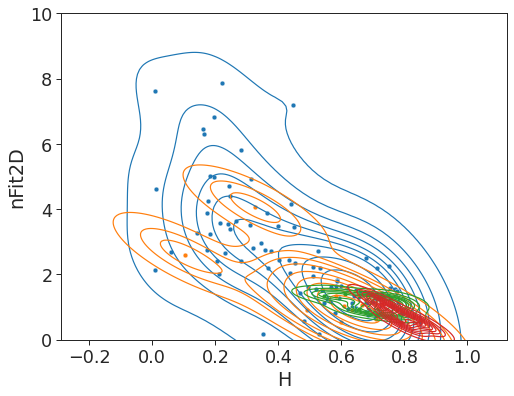

In [31]:
XX = 'H'
YY = 'nFit2D'

plt.figure(figsize=(8,6))
for jj in [J0, J1, J2, J3]:
    sea.scatterplot(x=D[jj][XX], y=D[jj][YY])
    sea.kdeplot(    x=D[jj][XX], y=D[jj][YY])
    plt.ylim(0,10)             

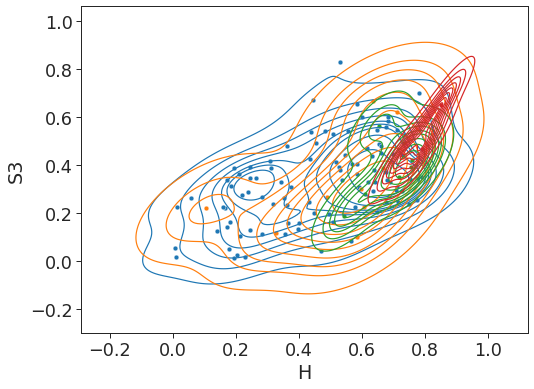

In [32]:
XX = 'H'
YY = 'S3'

plt.figure(figsize=(8,6))
for jj in [J0, J1, J2, J3]:
    sea.scatterplot(x=D[jj][XX], y=D[jj][YY])
    sea.kdeplot(    x=D[jj][XX], y=D[jj][YY])